In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [4]:
def exponentialRV(seed, mean, n):
    
    np.random.seed(seed) # Seeds the generator
    u = np.random.random_sample(n) # Returns an array of floats between 0 and 1
    exponentialSample = -mean*np.log(1-u)
    
    return exponentialSample

In [5]:
def poissonRV(seed, mean, n):
   
    np.random.seed(seed) # Seeds the generator
     # Returns an array of floats between 0 and 1
    poissonSample = []  

    for i in range(n):
        u = np.random.random_sample()
        x = 0 
        cdf = 0 # Probability Mass Function
        while cdf <= u: # Inverse Distribution Function 
            cdf += math.exp(-mean)*(mean**x)/np.math.factorial(x)
            x += 1
        poissonSample.append(x-1)
                 
    return poissonSample

In [6]:
def funnyDiceRV(seed, n):
    
    np.random.seed(seed) # Seeds the generator
    u = np.random.random_sample(n) # Returns an array of floats between 0 and 1
    funnyDiceRV = []
    
    for i in range(n):
        if 0.0 < u[i] <= 0.1: 
            funnyDiceRV.append(1)
        elif 0.1 < u[i] <= 0.2:
            funnyDiceRV.append(2)
        elif 0.2 < u[i] <= 0.3:
            funnyDiceRV.append(3)
        elif 0.3 < u[i] <= 0.4:
            funnyDiceRV.append(4)
        elif 0.4 < u[i] <= 0.5:
            funnyDiceRV.append(5) 
        else:
            funnyDiceRV.append(6) # Appends 6 to the list if u[i] is any number between 0.5 to 1
    
    return funnyDiceRV

In [7]:
print(exponentialRV(1, 2, 5)) 
print(poissonRV(1, 2,5))
print(funnyDiceRV(1, 5))

[1.07921167e+00 2.54825051e+00 2.28762717e-04 7.20025510e-01
 3.17419190e-01]
[2, 3, 0, 1, 1]
[5, 6, 1, 4, 2]


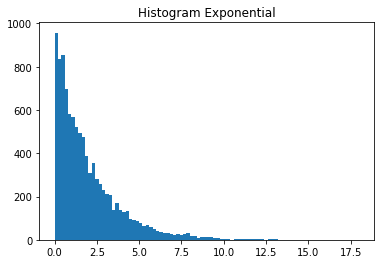

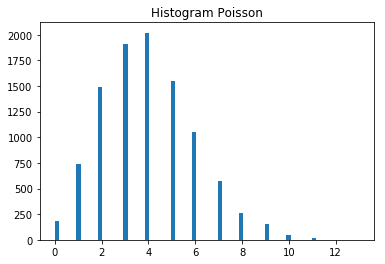

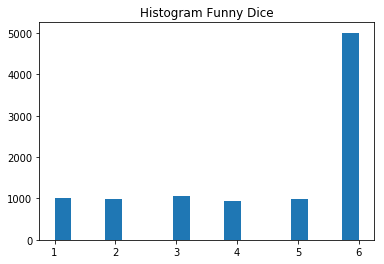

In [8]:
numberSimulations=10000
exponentialSamples=exponentialRV(1, 2,numberSimulations)
poissonSamples=poissonRV(1, 4,numberSimulations)
funnyDiceSamples=funnyDiceRV(1, numberSimulations)

#np.histogram(exponentialSamples)
plt.hist(exponentialSamples, bins='auto')
plt.title("Histogram Exponential")
plt.show()
plt.hist(poissonSamples, bins='auto')
plt.title("Histogram Poisson")
plt.show()
plt.hist(funnyDiceSamples, bins='auto')
plt.title("Histogram Funny Dice")
plt.show()

In [9]:
# Empirical Mean
def empirical_mean(exp_RV):
    
    summation = 0 
    length = len(exp_RV)
    
    for i in range(length):
        summation += exp_RV[i] 
    
    return summation/length   

In [10]:
# Empirical Variance
def empirical_var(exp_RV, u): 
    
    summation = 0 
    length = len(exp_RV)
    
    for i in exp_RV: 
        summation += (i - u)**2 
        
    return summation/length

In [11]:
print(empirical_mean(exponentialSamples))
u = empirical_mean(exponentialSamples) 
print(empirical_var(exponentialSamples,u))
# Yes, my results were in line with what I expected it to be because I assumed the empirical mean to be approximately the same value as given mean. 
# Additionally, the calculated variance also was approximately around what I expected because variance is normally the square of the mean (lambda) for exponential RV. 

1.9770938809848242
3.8485810293246394
